##This Notebook explores the iPython interface and functionality

There are many commands and shortcuts included in iPython.
Check the Help menu item for Keyboard Shortcuts and an Interface Tour
To get more help with the iPython interface enter a question mark.

In [4]:
?

To get help with any function enter that function's name followed by a question mark.

In [5]:
sum?

To get more detailed help add 2 question marks.

In [6]:
sum??

For help with magic functions:

In [6]:
%magic%

There are two types of magic functions, cell-oriented(%%) and line-oriented(%).

Let's explore edit mode!

In [7]:
# This imports NumPy and matplotlib into the global namespace
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


We want to know how an investment grows with at fixed interest rate.

The *compound interest* formula states that:
$$R = Pe^{rt}$$
where:

- $P$ is the principal (initial investment).
- $r$ is the annual interest rate, as a decimal.
- $t$ is the time in years.
- $e$ is the base of natural log.
- $R$ is the total return after $t$ years (including principal)

For details, see the [corresponding Wikipedia entry](http://en.wikipedia.org/wiki/Compound_interest).

We start by defining a Python function that implements the formula.

For more on typing mathematical formulas see this [introduction to LaTeX](https://en.wikibooks.org/wiki/LaTeX).

For more on typing mathematical formulas in any webpage see [MathJax](http://www.mathjax.org/).

In [8]:
def return_on_investment(principal, interest_rate, number_of_years):
    return principal * e ** (interest_rate * number_of_years)

In [9]:
principal = 250.
interest_rate = .034
tstart = 0.0
tend = 5.0
npoints = 6

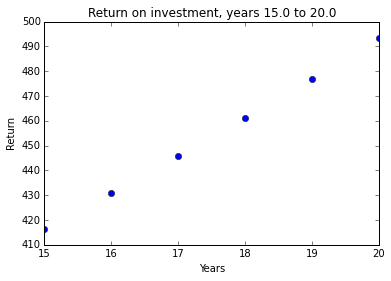

In [12]:
# Execute this cell with ctrl + enter several times 
# The code will re-execute and redraw the graph

tvalues = linspace(tstart, tend, npoints)
amount_values = return_on_investment(principal, interest_rate, tvalues)
plot(tvalues, amount_values, 'o')
title('Return on investment, years {} to {}'.format(tstart, tend))
xlabel('Years')
ylabel('Return')
tstart += tend
tend += tend

In [13]:
#press tab key for autocomplete options
#print am 
print amount_values

[ 416.32279874  430.721159    445.6174809   461.02898622  476.9734924
  493.46943306]


In [14]:
# press shift + tab for a popup with function and environment information
# click the + icon in the popup for more information

linspace

<function numpy.core.function_base.linspace>

To switch between command and edit mode click on a cell and 
* press `esc` for command mode or 
* press `enter` for edit mode.


Use the arrow keys to navigate to a different cell.

More fun with Magic Functions

In [15]:
# Using plain Python
%timeit return_on_investment(principal, interest_rate, tvalues)

The slowest run took 24.97 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 2.72 µs per loop


In [16]:
principal = 250.
interest_rates = [0.0001 * i for i in range(100000)]
tfinal = 10

In [17]:
%%timeit
returns = []
for r in interest_rates:
    returns.append(return_on_investment(principal, r, tfinal))

10 loops, best of 3: 31 ms per loop


In [18]:
# Same calculations using NumPy arrays
principal = 250.
interest_rates = arange(0, 10, 0.0001)
tfinal = 10

In [19]:
%%timeit
returns = return_on_investment(principal, interest_rates, tfinal)

100 loops, best of 3: 5.62 ms per loop


In [20]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%latex  %%

In [21]:
%pylab?

We can also use Cython.

In [22]:
# This is pure Python
import math
def sin_area(a, b, nintervals):
    dx = (b - a) / nintervals
    sleft = 0.0
    sright = 0.0
    for i in range(nintervals):
        sleft += math.sin(a + i * dx)
        sright += math.sin(a + (i + 1) * dx)
    return dx * (sright + sleft) / 2

In [23]:
sin_area(0, pi, 10000)

1.9999999835506608

In [24]:
%timeit sin_area(0, pi, 10000)

The slowest run took 5.08 times longer than the fastest. This could mean that an intermediate result is being cached 
100 loops, best of 3: 4.13 ms per loop


In [25]:
# This is Cython
%load_ext Cython

In [26]:
%%cython
cimport cython
from libc.math cimport sin

@cython.cdivision(True)
def sin_area_cython(a,b, nintervals):
    cdef double dx, sleft, sright
    cdef int i
    dx = (b - a) / nintervals
    sleft = 0.0
    sright = 0.0
    for i in range(nintervals):
        sleft += sin(a + i * dx)
        sright += sin(a + (i + 1) * dx)
    return dx * (sright + sleft) / 2

In [27]:
sin_area_cython(0, pi, 10000)

1.9999999835506608

In [28]:
%timeit sin_area_cython(0, pi, 10000)

The slowest run took 4.15 times longer than the fastest. This could mean that an intermediate result is being cached 
1000 loops, best of 3: 844 µs per loop


In [29]:
# Now with NumPy!
def sin_area_numpy(a, b, nintervals):
    dx = (b - a) / nintervals
    xvalues = arange(a, b, dx)
    sleft = sum(sin(xvalues))
    sright = sum(sin(xvalues + dx))
    return dx * (sleft + sright) / 2

In [30]:
sin_area_numpy(0, pi, 10000)

1.9999999835506592

In [31]:
%timeit sin_area_numpy(0, pi, 10000)

The slowest run took 4.27 times longer than the fastest. This could mean that an intermediate result is being cached 
1000 loops, best of 3: 381 µs per loop


So Boom! NumPy wins!

We can run shell commands.

In [58]:
mkdir my_directory

In [60]:
cd my_directory

/home/cynthia/projects/my_notebooks/my_directory


In [62]:
!touch boom

In [63]:
ls

boom


In [65]:
rm boom

In [66]:
ls

Sometimes shell commands require a bang (!) before the command and sometimes not. :/

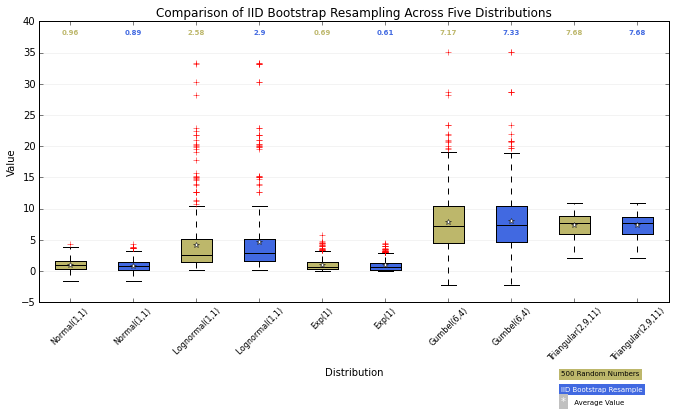

In [32]:
# %load http://matplotlib.org/mpl_examples/pylab_examples/boxplot_demo2.py
"""
Thanks Josh Hemann for the example
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Generate some data from five different probability distributions,
# each with different characteristics. We want to play with how an IID
# bootstrap resample of the data preserves the distributional
# properties of the original sample, and a boxplot is one visual tool
# to make this assessment
numDists = 5
randomDists = ['Normal(1,1)',' Lognormal(1,1)', 'Exp(1)', 'Gumbel(6,4)',
              'Triangular(2,9,11)']
N = 500
norm = np.random.normal(1,1, N)
logn = np.random.lognormal(1,1, N)
expo = np.random.exponential(1, N)
gumb = np.random.gumbel(6, 4, N)
tria = np.random.triangular(2, 9, 11, N)

# Generate some random indices that we'll use to resample the original data
# arrays. For code brevity, just use the same random indices for each array
bootstrapIndices = np.random.random_integers(0, N-1, N)
normBoot = norm[bootstrapIndices]
expoBoot = expo[bootstrapIndices]
gumbBoot = gumb[bootstrapIndices]
lognBoot = logn[bootstrapIndices]
triaBoot = tria[bootstrapIndices]

data = [norm, normBoot,  logn, lognBoot, expo, expoBoot, gumb, gumbBoot,
       tria, triaBoot]

fig, ax1 = plt.subplots(figsize=(10,6))
fig.canvas.set_window_title('A Boxplot Example')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
              alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Comparison of IID Bootstrap Resampling Across Five Distributions')
ax1.set_xlabel('Distribution')
ax1.set_ylabel('Value')

# Now fill the boxes with desired colors
boxColors = ['darkkhaki','royalblue']
numBoxes = numDists*2
medians = range(numBoxes)
for i in range(numBoxes):
  box = bp['boxes'][i]
  boxX = []
  boxY = []
  for j in range(5):
      boxX.append(box.get_xdata()[j])
      boxY.append(box.get_ydata()[j])
  boxCoords = zip(boxX,boxY)
  # Alternate between Dark Khaki and Royal Blue
  k = i % 2
  boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
  ax1.add_patch(boxPolygon)
  # Now draw the median lines back over what we just filled in
  med = bp['medians'][i]
  medianX = []
  medianY = []
  for j in range(2):
      medianX.append(med.get_xdata()[j])
      medianY.append(med.get_ydata()[j])
      plt.plot(medianX, medianY, 'k')
      medians[i] = medianY[0]
  # Finally, overplot the sample averages, with horizontal alignment
  # in the center of each box
  plt.plot([np.average(med.get_xdata())], [np.average(data[i])],
           color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, numBoxes+0.5)
top = 40
bottom = -5
ax1.set_ylim(bottom, top)
xtickNames = plt.setp(ax1, xticklabels=np.repeat(randomDists, 2))
plt.setp(xtickNames, rotation=45, fontsize=8)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(numBoxes)+1
upperLabels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
for tick,label in zip(range(numBoxes),ax1.get_xticklabels()):
   k = tick % 2
   ax1.text(pos[tick], top-(top*0.05), upperLabels[tick],
        horizontalalignment='center', size='x-small', weight=weights[k],
        color=boxColors[k])

# Finally, add a basic legend
plt.figtext(0.80, 0.08,  str(N) + ' Random Numbers' ,
           backgroundcolor=boxColors[0], color='black', weight='roman',
           size='x-small')
plt.figtext(0.80, 0.045, 'IID Bootstrap Resample',
backgroundcolor=boxColors[1],
           color='white', weight='roman', size='x-small')
plt.figtext(0.80, 0.015, '*', color='white', backgroundcolor='silver',
           weight='roman', size='medium')
plt.figtext(0.815, 0.013, ' Average Value', color='black', weight='roman',
           size='x-small')

plt.show()


You can also run other languages in the Notebook with the magic function for that language.  
- %%html
- %%svg
- %%bash
- %%javascript
- %%latex

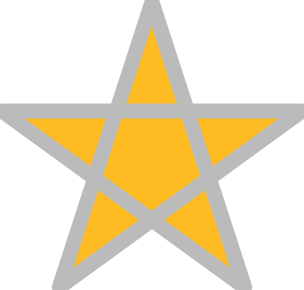

In [35]:
%%SVG
<svg xmlns="http://www.w3.org/2000/svg"
      width="304" height="290">
   <path d="M2,111 h300 l-242.7,176.3 92.7,-285.3 92.7,285.3 z" 
      style="fill:#FB2;stroke:#BBB;stroke-width:15;stroke-linejoin:round"/>
</svg>

In [36]:
%%html
<h1 id='hey-there'>Hey there!</h1>

In [42]:
%%javascript
element = document.getElementById('hey-there');
element.style.color = '#008cb0';

<IPython.core.display.Javascript object>

###Working With Data

We can save data to a file and load it back in.

In [45]:
cd my_directory

/home/cynthia/projects/my_notebooks/my_directory


In [48]:
A = rand(5, 10)
print A
save('random_array.npy', A)

[[ 0.23611971  0.31308095  0.99978609  0.94550666  0.18176498  0.03828145
   0.73407048  0.88747387  0.22541006  0.63601296]
 [ 0.43306814  0.679696    0.73144023  0.69021461  0.98039234  0.85458405
   0.51458137  0.23321806  0.63573577  0.88398743]
 [ 0.93329371  0.94418997  0.73823852  0.83341319  0.26090339  0.56260339
   0.51606079  0.12412965  0.28225027  0.10588243]
 [ 0.7727872   0.66282664  0.8363135   0.187221    0.55726626  0.00527592
   0.64858648  0.12366457  0.15535969  0.4317944 ]
 [ 0.89076392  0.26771461  0.17696609  0.05902707  0.18423687  0.47287234
   0.7945575   0.62754627  0.37017294  0.59683253]]


In [49]:
ls

random_array.npy


In [50]:
del A

In [51]:
A

NameError: name 'A' is not defined

In [52]:
A = load('random_array.npy')

In [53]:
A

array([[ 0.23611971,  0.31308095,  0.99978609,  0.94550666,  0.18176498,
         0.03828145,  0.73407048,  0.88747387,  0.22541006,  0.63601296],
       [ 0.43306814,  0.679696  ,  0.73144023,  0.69021461,  0.98039234,
         0.85458405,  0.51458137,  0.23321806,  0.63573577,  0.88398743],
       [ 0.93329371,  0.94418997,  0.73823852,  0.83341319,  0.26090339,
         0.56260339,  0.51606079,  0.12412965,  0.28225027,  0.10588243],
       [ 0.7727872 ,  0.66282664,  0.8363135 ,  0.187221  ,  0.55726626,
         0.00527592,  0.64858648,  0.12366457,  0.15535969,  0.4317944 ],
       [ 0.89076392,  0.26771461,  0.17696609,  0.05902707,  0.18423687,
         0.47287234,  0.7945575 ,  0.62754627,  0.37017294,  0.59683253]])

In [54]:
rm random_array.npy

In [57]:
xvalues = arange(0., 10., 0.5)
xsquares = xvalues ** 2
print xvalues
print xsquares
savez('values_and_squares.npz', values=xvalues, squares=xsquares)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9.   9.5]
[  0.     0.25   1.     2.25   4.     6.25   9.    12.25  16.    20.25  25.
  30.25  36.    42.25  49.    56.25  64.    72.25  81.    90.25]


In [58]:
ls

values_and_squares.npz


In [59]:
my_data = load('values_and_squares.npz')

In [60]:
type(my_data)

numpy.lib.npyio.NpzFile

In [61]:
my_data.files

['squares', 'values']

In [66]:
squares = my_data['squares']
values = my_data['values']
print squares

[  0.     0.25   1.     2.25   4.     6.25   9.    12.25  16.    20.25  25.
  30.25  36.    42.25  49.    56.25  64.    72.25  81.    90.25]


In [67]:
squares == xsquares

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True], dtype=bool)

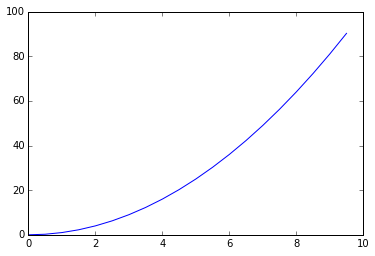

In [68]:
plot(values, squares)

###Images and YouTube Videos

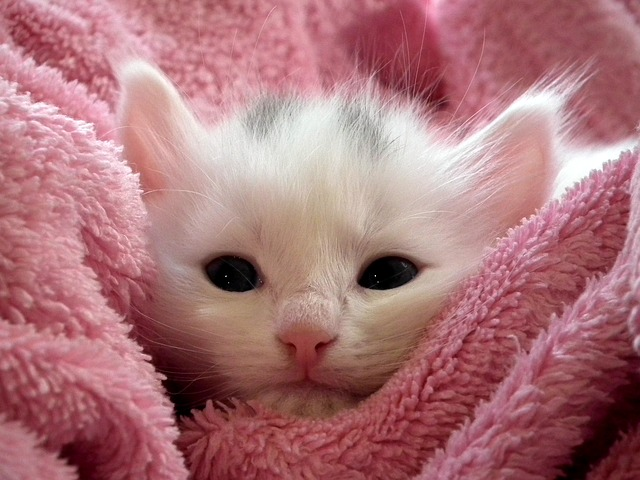

In [79]:
from IPython.display import Image
Image('http://pixabay.com/static/uploads/photo/2013/12/12/03/09/kitten-227011_640.jpg')

Awww!

In [71]:
from IPython.display import YouTubeVideo
YouTubeVideo('BGa3AqeqRy0')

###HTML

First we generate some images.

In [89]:
html_string = '<table style="padding: 20px">\n'
html_string += '<tr>\n'
html_string += '<td style="width: 120px;">Sticky Pup</td>\n'
html_string += '<td style="width: 300px;">'
html_string += '<img src="https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcSqWJBhKW_kqrf2sk-3uGCJhtiQVXSDj6VIUYsxN2PWaPiQOeky5A">'
html_string += '</td>\n'
html_string += '</tr>\n'
html_string += '<tr>\n'
html_string += '<td style="width: 120px;">Happy Pup</td>\n'
html_string += '<td style="width: 300px;">'
html_string += '<img src="https://encrypted-tbn2.gstatic.com/images?q=tbn:ANd9GcSJ1iy5V37RXh3jg_JIV4HLXcnsmTYiBoSYs2VrSFNBqWk2V6fg">'
html_string += '</td>\n'
html_string += '</tr>\n'
html_string += '<tr>\n'
html_string += '<td style="width: 120px;">Pensive Pup</td>\n'
html_string += '<td style="width: 300px;">'
html_string += '<img src="https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcRJLbfMUNVVX851ItTjGI0Y7A6smMNbLDhNxu6Gp7K6dTto9InZ">'
html_string += '</td>\n'
html_string += '</tr>\n'
html_string += '</table>\n'

In [90]:
print html_string

<table style="padding: 20px">
<tr>
<td style="width: 120px;">Sticky Pup</td>
<td style="width: 300px;"><img src="https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcSqWJBhKW_kqrf2sk-3uGCJhtiQVXSDj6VIUYsxN2PWaPiQOeky5A"></td>
</tr>
<tr>
<td style="width: 120px;">Happy Pup</td>
<td style="width: 300px;"><img src="https://encrypted-tbn2.gstatic.com/images?q=tbn:ANd9GcSJ1iy5V37RXh3jg_JIV4HLXcnsmTYiBoSYs2VrSFNBqWk2V6fg"></td>
</tr>
<tr>
<td style="width: 120px;">Pensive Pup</td>
<td style="width: 300px;"><img src="https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcRJLbfMUNVVX851ItTjGI0Y7A6smMNbLDhNxu6Gp7K6dTto9InZ"></td>
</tr>
</table>



In [91]:
from IPython.display import HTML
HTML(html_string)

Sticky Pup,
Happy Pup,
Pensive Pup,
